<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting some stock data, and then displaying this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>1: Use yfinance to Extract Stock Data</li>
        <li>2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>3: Use yfinance to Extract Stock Data</li>
        <li>4: Use Webscraping to Extract GME Revenue Data</li>
        <li>5: Plot Tesla Stock Graph</li>
        <li>6: Plot GameStop Stock Graph</li>
    </ul>
<p>
  
</div>

<hr>


In [10]:
!pip install yfinance==0.1.70
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install html5lib


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━╸━━━━━━━━━━━━━━━╸━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

In [11]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Ignoring warnings using the warnings module, using the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, the function `make_graph` is defined.It takes a dataframe with stock data (dataframe containing Date and Close columns), a dataframe with revenue data (dataframe containing Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## 1: Using yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock to extract data and to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` to extract stock information and save it in a dataframe named `tesla_data`. Setting the `period` parameter to `max` to get information for the maximum amount of time.


In [6]:
tesla_data = tesla.history(period='max')

**Resetting the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and displaying the first five rows of the `tesla_data` dataframe using the `head` function.

In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


## 2: Use Webscraping to Extract Tesla Revenue Data


Using the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Saving the text of the response as a variable named `html_data`.


In [8]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

Parsing the html data using `beautiful_soup`.


In [12]:
soup = BeautifulSoup(html_data,'html5lib')

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

Using `BeautifulSoup` or the `read_html` function to extract the table with `Tesla Revenue` and storing it into a dataframe named `tesla_revenue`. The dataframe have columns `Date` and `Revenue`.


In [22]:
tesla_revenue = pd.read_html(str(soup))[1]
tesla_revenue.columns = ['Date','Revenue']
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Removing the comma and dollar sign from the `Revenue` column. 


In [23]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Removing null or empty strings in the Revenue column.


In [24]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Displaying the last 5 row of the `tesla_revenue` dataframe using the `tail` function.


In [25]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## 3: Using yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock to extract data and to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [26]:
gme = yf.Ticker('GME')

Using the ticker object and the function `history`, extracting stock information and saving it in a dataframe named `gme_data`. Setting the `period` parameter to `max` to get information for the maximum amount of time.


In [29]:
gme_data = gme.history(period='max')

**Resetting the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and displaying the first five rows of the `gme_data` dataframe using the `head` function.

In [30]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## 4: Using Webscraping to Extract GME Revenue Data


Using the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Saving the text of the response as a variable named `html_data`.


In [31]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

Parsing the html data using `beautiful_soup`.


In [32]:
soup = BeautifulSoup(html_data,'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and storing it into a dataframe named `gme_revenue`. The dataframe have columns `Date` and `Revenue`.


In [40]:
gme_revenue = pd.read_html(str(soup))[1]
gme_revenue.columns = ['Date','Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

Displaying the last five rows of the `gme_revenue` dataframe using the `tail` function. 


In [41]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## 5: Plot Tesla Stock Graph


Using the `make_graph` function to graph the Tesla Stock Data.The graph will only show data upto June 2021.


In [1]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

<class 'NameError'>: name 'make_graph' is not defined

## 6: Plot GameStop Stock Graph


Using the `make_graph` function to graph the GameStop Stock Data. The graph will only show data upto June 2021.


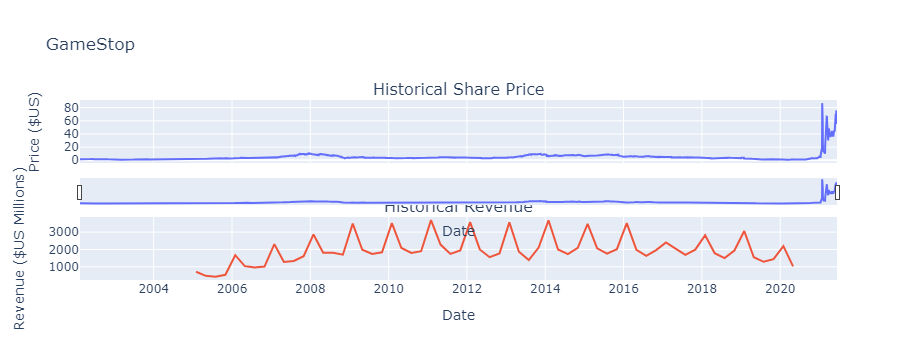

In [55]:
make_graph(gme_data, gme_revenue, 'GameStop')